



{% include toc title="In This Lesson" icon="file-text" %}



<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives



After completing this tutorial, you will be able to:



* Calculate `dNBR` in `R`

* Describe how the `dNBR` index is used to quantify fire severity.



## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need



You will need a computer with internet access to complete this lesson and the

data for week 6 of the course.



{% include/data_subsets/course_earth_analytics/_data-cold-springs-fire.md %}

</div>



As mentioned in the previous lesson, we can use NBR to map the extent and severity of a fire.

Let's explore creating NBR using Landsat data.



## Calculate dNBR using Landsat data



First, let's setup our spatial packages.




In [104]:
import rasterio as rio
import geopandas as gpd
import earthpy as et
import os
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
import matplotlib.pyplot as plt
from rasterio.plot import show
from glob import glob
import numpy as np
plt.ion()

from scipy.misc import bytescale



Next, we open up our landsat data and create a spatial raster stack.






In [105]:
all_landsat_bands_pre_cloud = glob("data/week_07/landsat/LC80340322016189-SC20170128091153/crop/*band*.tif")
all_landsat_bands_pre_cloud = [rio.open(ifile) for ifile in all_landsat_bands_pre_cloud]
all_landsat_bands_pre_data_cloud = np.array([ifile.read()[0] for ifile in all_landsat_bands_pre_cloud])
#all_landsat_bands_pre_data_cloud[1]

In [106]:
all_landsat_bands_pre_cloud[1].profile
# unsigned int -- all positive
# in can be negative

{'affine': Affine(30.0, 0.0, 455655.0,
       0.0, -30.0, 4428465.0),
 'compress': 'lzw',
 'count': 1,
 'crs': CRS({'init': 'epsg:32613'}),
 'driver': 'GTiff',
 'dtype': 'int16',
 'height': 177,
 'interleave': 'band',
 'nodata': -32768.0,
 'tiled': False,
 'transform': (455655.0, 30.0, 0.0, 4428465.0, 0.0, -30.0),
 'width': 246}

In [107]:
print(all_landsat_bands_pre_cloud[1].nodatavals)

(-32768.0,)




Next we calculate dNBR using the following steps:



1. Open up pre-fire data and calculate *NBR*

2. Open up the post-fire data and calculate *NBR*

3. Calculate **dNBR** (difference NBR) by subtracting post-fire NBR from pre-fire NBR.

4. Classify the dNBR raster using the classification table below.



. Note the code to do this is hidden. You will need to figure

out what bands are required to calculate NBR using Landsat.




In [108]:
landsat_nbr_pre_cloud = ((all_landsat_bands_pre_data_cloud[4] - all_landsat_bands_pre_data_cloud[6]) / (all_landsat_bands_pre_data_cloud[4] + all_landsat_bands_pre_data_cloud[6]))
#landsat_nbr_pre_cloud[np.isnan(landsat_nbr_pre_cloud)] = 0


/Users/lewa8222/anaconda/envs/earth-analytics-python/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


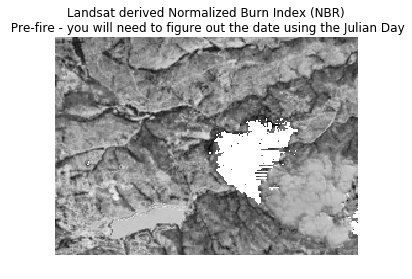

In [109]:
fig, ax = plt.subplots()
ax.imshow(landsat_nbr_pre_cloud, cmap='Greys')
ax.set(title="Landsat derived Normalized Burn Index (NBR)\n Pre-fire - you will need to figure out the date using the Julian Day")
ax.set_axis_off()

These data have clouds. let's use the cloud free data

ValueError: max must be larger than min in range parameter.

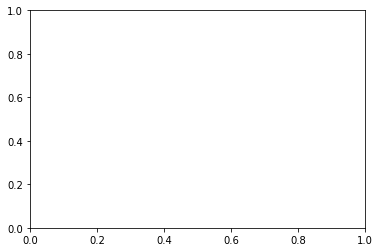

In [110]:
# create histogram of nbr data -- why is this crazy ??
fig, ax = plt.subplots()
ax.hist(landsat_nbr_pre_cloud.ravel(), bins=20, color="purple")
ax.set_title("Landsat derived Normalized Burn Index (NBR)\n Pre-fire - you will need to figure out the date using the Julian Day");
#ax.set_axis_off()

In [ ]:
# trying here to grab the bounds of this raster to use to clip the other raster
# how can i do that?
# do i need to turn it into a shapefile?
landsat_band5 = all_landsat_bands_pre_cloud[4]
landsat_band5.bounds


Here, we import another landsat scene. However this scene is not cropped. This means that is has many edge NaN valued pixels in it. i think this is causing issues. 





You can export the NBR raster if you want using `writeRaster()`.




In [ ]:
with rio.open('data/week_06/outputs/landsat_nbr.tif', 'w', driver='GTiff', dtype='int32',
              width=landsat_nbr_pre.shape[1], height=landsat_nbr_pre.shape[0], count=1) as dst:
    dst.write(landsat_nbr_pre.astype(np.int32), 1)

In [ ]:
# ```{r export-rasters, eval=FALSE }

# writeRaster(x = landsat_nbr_pre,

#               filename="data/week6/outputs/landsat_nbr",

#               format = "GTiff", # save as a tif

#               datatype='INT2S', # save as a INTEGER rather than a float

#               overwrite = T)

# ```






Next, we can open the post-fire landsat data to calculate post-fire NBR.




In [ ]:
all_landsat_bands_post = glob("data/week_07/landsat/LC80340322016205-SC20170127160728/crop/*band*.tif")
all_landsat_bands_post = [rio.open(ifile) for ifile in all_landsat_bands_post]
all_landsat_bands_post_data = np.array([ifile.read()[0] for ifile in all_landsat_bands_post])

In [ ]:
# ```{r create-landsat-stack-post }

# all_landsat_bands_post <- list.files("data/week6/Landsat/LC80340322016205-SC20170127160728/crop",

#            pattern=glob2rx("*band*.tif$"),

#            full.names = T) # use the dollar sign at the end to get all files that END WITH

# all_landsat_bands_post



# # stack the data

# landsat_stack_post <- stack(all_landsat_bands_post)

# ```




Then we calculate NBR on the post data - note the code here is purposefully hidden.

You need to figure out what bands to use to perform the math!




In [ ]:
landsat_nbr_post = ((all_landsat_bands_post_data[4] - all_landsat_bands_post_data[6]) / (all_landsat_bands_post_data[4] + all_landsat_bands_post_data[6]))
landsat_nbr_post[np.isnan(landsat_nbr_post)] = 0

In [ ]:
fig, ax = plt.subplots()
ax.imshow(landsat_nbr_post, cmap='Greys')
ax.set(title="Landsat derived Normalized Burn Index (NBR)\n Post Fire")
ax.set_axis_off()

In [ ]:
# ```{r calculate-nbr-post, echo=FALSE, fig.cap="landsat derived NBR post fire", fig.width=7, fig.height=5}

# # Landsat 8 requires bands 7 and 5

# landsat_nbr_post <- ((landsat_stack_post[[5]] - landsat_stack_post[[7]]) / (landsat_stack_post[[5]] + landsat_stack_post[[7]]))



# plot(landsat_nbr_post,

#      main="Landsat derived Normalized Burn Index (NBR)\n Post Fire",

#      axes=F,

#      box=F)

# ```




Finally, calculate the DIFFERENCE between the pre and post NBR!!




In [ ]:
landsat_nbr_diff = landsat_nbr_pre - landsat_nbr_post
fig, ax = plt.subplots()
ax.imshow(landsat_nbr_diff, cmap='Greys')
ax.set(title="Difference NBR map \n Pre minus post Cold Springs fire")
ax.set_axis_off()

In [ ]:
# ```{r, fig.cap="Difference NBR map", fig.width=7, fig.height=5}

# # calculate difference

# landsat_nbr_diff <- landsat_nbr_pre - landsat_nbr_post

# plot(landsat_nbr_diff,

#      main="Difference NBR map \n Pre minus post Cold Springs fire",

#      axes=F, box=F)

# ```




When you have calculated dNBR or the difference in NBR pre minus post fire,

classify the output raster using the `classify()` function and the classes below.



| SEVERITY LEVEL  | | dNBR RANGE |

|------------------------------|

| Enhanced Regrowth | | > -.1 |

| Unburned       |  | -.1 to +.1 |

| Low Severity     | | +.1 to +.27 |

| Moderate Severity  | | +.27 to +.66 |

| High Severity     |  |  > +1.3 |



NOTE: your min an max values for NBR may be slightly different from the table

shown above! If you have a smaller min value (< -700) then adjust your first class

to that smallest number. If you have a largest max value (>1300) then adjust

your last class to that largest value in your data.



Alternatively, you can use the `Inf` to specify the smallest `-Inf` and largest

`Inf` values.






In [ ]:
nbr_classified = np.digitize(landsat_nbr_diff, [-.1, .1, .27, .66, np.inf])
the_colors = ["seagreen4", "seagreen1", "ivory1", "palevioletred1", "palevioletred4"]

In [ ]:
# ```{r classify-output, echo=F}

# # create classification matrix

# reclass <- c(-Inf, -.1, 1,

#              -.1, .1, 2,

#              .1, .27, 3,

#              .27, .66, 4,

#              .66, Inf , 5)

# # reshape the object into a matrix with columns and rows

# reclass_m <- matrix(reclass,

#                 ncol=3,

#                 byrow=TRUE)



# nbr_classified <- reclassify(landsat_nbr_diff,

#                      reclass_m)

# the_colors = c("seagreen4", "seagreen1", "ivory1", "palevioletred1", "palevioletred4")

# ```






Your classified map should look something like:




In [ ]:
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
import seaborn as sns

In [ ]:
categories = ["Enhanced Regrowth", "Unburned", "Low Severity", "Moderate Severity", "High Severity"]

In [ ]:
landsat_nbr_diff = landsat_nbr_pre - landsat_nbr_post
fig, ax = plt.subplots()
im = ax.imshow(nbr_classified, cmap='RdYlGn')
ax.set(title="Landsat NBR - Cold Spring fire site \n Add date of the data here")
ax.set_axis_off()
cbar = fig.colorbar(im)
cbar.set_ticks(range(5))
cbar.set_ticklabels(categories[::-1])

In [ ]:
# ```{r classify-output-plot, echo=FALSE, fig.cap="classified NBR output", fig.width=7, fig.height=5}

# # mar bottom, left, top and right

# par(xpd = F, mar=c(0,0,2,5))

# plot(nbr_classified,

#      col=the_colors,

#      legend=F,

#      axes=F,

#      box=F,

#      main="Landsat NBR - Cold Spring fire site \n Add date of the data here")

# par(xpd = TRUE)

# legend(nbr_classified@extent@xmax-100, nbr_classified@extent@ymax,

#        c("Enhanced Regrowth", "Unburned", "Low Severity", "Moderate Severity", "High Severity"),

#        fill=the_colors,

#        cex=.9,

#        bty="n")



# ```




## Compare to fire boundary



As an example to see how our fire boundary relates to the boundary that we've

identified using MODIS data, we can create a map with both layers. I'm using

the shapefile in the folder:



`data/week6/vector_layers/fire-boundary-geomac/co_cold_springs_20160711_2200_dd83.shp`



Add fire boundary to map.




In [ ]:
fire_boundary = gpd.read_file("data/week_06/vector_layers/fire-boundary-geomac/co_cold_springs_20160711_2200_dd83.shp")
fire_boundary = fire_boundary.to_crs(all_landsat_bands_pre[0].crs)
bounds = all_landsat_bands_pre[0].bounds

In [ ]:
landsat_nbr_diff = landsat_nbr_pre - landsat_nbr_post
fig, ax = plt.subplots()
im = ax.imshow(nbr_classified, cmap='RdYlGn', extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
ax.set(title="Landsat NBR - Cold Spring fire site \n Add date of the data here")
ax.set_axis_off()
cbar = fig.colorbar(im)
cbar.set_ticks(range(5))
cbar.set_ticklabels(categories[::-1])
fire_boundary.plot(ax=ax, alpha=.4)


In [ ]:
# ```{r classify-output-plot2, echo=FALSE, fig.cap="classified NBR output", results='hide', fig.width=7, fig.height=5}

# fire_boundary <- readOGR("data/week6/vector_layers/fire-boundary-geomac/co_cold_springs_20160711_2200_dd83.shp")

# # reproject shapefile

# fire_boundary_utm <- spTransform(fire_boundary, crs(nbr_classified))





# # mar bottom, left, top and right

# par(mar=c(0,0,2,5))

# plot(nbr_classified,

#      col=the_colors,

#      legend=F,

#      axes=F,

#      box=F,

#      main="Landsat NBR - Cold Spring fire site \n Add date of the data here")

# plot(fire_boundary_utm, add=T,

#      lwd=5)

# legend(nbr_classified@extent@xmax-100, nbr_classified@extent@ymax,

#        c("Enhanced Regrowth", "Unburned", "Low Severity", "Moderate Severity", "High Severity", "Fire boundary"),

#        col= "black",

#        pt.bg=rev(the_colors),

#        pch=c(22, 22, 22, 22, 22, NA),

#        lty = c(NA, NA, NA, NA, NA, 1),

#        cex=.8,

#        bty="n",

#        pt.cex=c(1.75),

#        xpd = TRUE)



# ```


In [ ]:
# ```{r dev-off1, echo=FALSE, warning=FALSE, message=FALSE, results="hide"}

# dev.off()

# ```




Make it look a bit nicer using a colorbrewer palette. I used the

`RdYlGn` palette:



`brewer.pal(5, 'RdYlGn')`






In [ ]:
# Already did this above

In [ ]:
# ```{r classify-output-plot3, echo=FALSE, fig.cap="classified NBR output", fig.width=7, fig.height=5}

# # look at colors

# # display.brewer.all()

# the_colors <- rev(brewer.pal(5, 'RdYlGn'))

# # mar bottom, left, top and right

# par(mar=c(0,0,2,5))

# plot(nbr_classified,

#      col=the_colors,

#      legend=F,

#      axes=F,

#      box=F,

#      main="Landsat NBR - Cold Spring fire site \n Add date of the data here")

#      plot(fire_boundary_utm, add=T,

#           lwd=5)

# legend(nbr_classified@extent@xmax-50, nbr_classified@extent@ymax,

#        c("Enhanced Regrowth", "Unburned", "Low Severity", "Moderate Severity", "High Severity", "Fire boundary"),

#        col= "black",

#        pt.bg = the_colors,

#        pch=c(22, 22, 22, 22, 22, NA),

#        lty = c(NA, NA, NA, NA, NA, 1),

#        cex=.8,

#        bty="n",

#        pt.cex=c(1.75),

#        xpd=T)

# ```




Note that you will have to figure out what date these data are for! I purposefully

didn't include it in the title of this map.




In [ ]:
# ```{r dev-off, echo=FALSE, warning=FALSE, message=FALSE, results="hide", fig.width=7, fig.height=5}

# dev.off()

# ```


In [ ]:
# This may not be quite right...

In [ ]:
fig, ax = plt.subplots()
ax.hist(nbr_classified.ravel(), bins=range(5))
ax.set_xticks(np.arange(5) + .5)
ax.set_xticklabels(categories, rotation=45, horizontalalignment='right')
ax.set(title="Distribution of Classified NBR Values")

In [ ]:
# ```{r view-bar, warning=FALSE, fig.cap="plot barplot of fire severity values"}

# barplot(nbr_classified,

#         main="Distribution of Classified NBR Values",

#         col=the_colors)

# ```




Add labels to your barplot!




In [ ]:
# ```{r view-barplot1, warning=FALSE, fig.cap="plot barplot of fire severity values with labels"}

# barplot(nbr_classified,

#         main="Distribution of Classified NBR Values",

#         col=the_colors,

#         names.arg = c("Enhanced \nRegrowth", "Unburned", "Low \n Severity", "Moderate \n Severity", "High \nSeverity"))

# ```
